# Getting Into Shape: Array Shapes and Axes 


## Table of Contents 
* [Mastering Shape](#mastering_shape)
* [Understanding Axes](#understanding_axes)
    * [Reshaping Arrays](#reshaping_arrays)
* [Broadcasting](#broadcasting)
    * [General Broadcasting Rules](#general_broadcasting_rules)
    * [More Arrays Broadcasting Examples](#more_arrays_broadcasting_examples)

---

Now that you’ve seen some of what NumPy can do, it’s time to firm up that foundation with some important theory. There are a few concepts that are important to keep in mind, especially as you work with arrays in higher dimensions.

**Vectors**, which are one-dimensional arrays of numbers, are the least complicated to keep track of. Two dimensions aren’t too bad, either, because they’re similar to spreadsheets. But things start to get tricky at three dimensions, and visualizing four? Forget about it.

<a class="anchor" id="mastering_shape"></a>


## Mastering Shape

Shape is a key concept when you’re using multidimensional arrays. At a certain point, it’s easier to forget about visualizing the shape of your data and to instead follow some mental rules and trust NumPy to tell you the correct shape.

All arrays have a property called `.shape` that returns a tuple of the size in each dimension. It’s less important which dimension is which, but it’s critical that the arrays you pass to functions are in the shape that the functions expect. A common way to confirm that your data has the proper shape is to print the data and its shape until you’re sure everything is working like you expect.

This next example will show this process. You’ll create an array with a complex shape, check it, and reorder it to look like it’s supposed to:

In [15]:
import numpy as np

temperatures = np.array([
    29.3, 42.1, 18.8, 16.1, 38.0, 12.5,
    12.6, 49.9, 38.6, 31.3, 9.2, 22.2
]).reshape(2, 2, 3)

temperatures.shape

(2, 2, 3)

In [3]:
temperatures

array([[[29.3, 42.1, 18.8],
        [16.1, 38. , 12.5]],

       [[12.6, 49.9, 38.6],
        [31.3,  9.2, 22.2]]])

In [4]:
np.swapaxes(temperatures, 1, 2)

array([[[29.3, 16.1],
        [42.1, 38. ],
        [18.8, 12.5]],

       [[12.6, 31.3],
        [49.9,  9.2],
        [38.6, 22.2]]])

Here, you use a `numpy.ndarray` method called `.reshape()` to form a `2 × 2 × 3` block of data. When you check the shape of your array in input 3, it’s exactly what you told it to be. However, you can see how printed arrays quickly become hard to visualize in three or more dimensions. After you swap axes with `.swapaxes()`, it becomes little clearer which dimension is which. You’ll see more about axes in the next section.

Shape will come up again in the section on broadcasting. For now, just keep in mind that these little checks don’t cost anything. You can always delete the cells or get rid of the code once things are running smoothly.

<a class="anchor" id="reshaping_arrays"></a>


### Reshaping Arrays

Another important concept here is to reshape your NumPy Arrays, especially when you are dealing with multidimensional arrays. It's common for you to create a NumPy Array in just one dimension, reshaping it to a multidimension later, or vice versa. A key idea here is that you can change the shape of your arrays, but the number of elements should not be changed; for example, you can't reshape a `3x3` array to a `10x1` array. The total number of elements (or a so-called data buffer in the ndarray internal organization) should be consistent before and after reshaping. Or ,you might need to resize, but that's another story. Now, let's look at some shape manipulations:

In [12]:
x = np.arange(24)

In [13]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [14]:
x.shape = 2, 3, -1

In [15]:
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

<a class="anchor" id="understanding_axes"></a>


## Understanding Axes

The example above shows how important it is to know not only what shape your data is in but also which data is in which **axis**. In NumPy arrays, axes are zero-indexed and identify which dimension is which. For example, a two-dimensional array has a vertical axis (axis 0) and a horizontal axis (axis 1). Lots of functions and commands in NumPy change their behavior based on which axis you tell them to process.

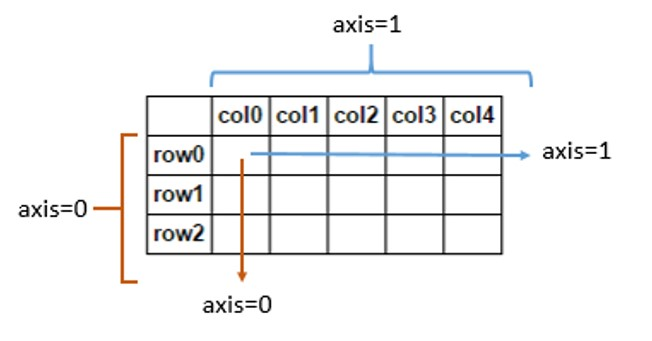

This example will show how `.max()` behaves by default, with no `axis` argument, and how it changes functionality depending on which axis you specify when you do supply an argument:

In [2]:
import numpy as np

table = np.array([
    [5, 3, 7, 1, 2],
    [2, 6, 7 , 9 ,3],
    [1, 1, 1, 1, 8],
    [4, 3, 2, 0, 10],
])

In [3]:
table

array([[ 5,  3,  7,  1,  2],
       [ 2,  6,  7,  9,  3],
       [ 1,  1,  1,  1,  8],
       [ 4,  3,  2,  0, 10]])

In [4]:
table.shape

(4, 5)

In [5]:
table.max()

10

In [6]:
table.max(axis=0)

array([ 5,  6,  7,  9, 10])

In [7]:
table.max(axis=1)

array([ 7,  9,  8, 10])

In fact, many of NumPy’s functions behave this way: If no axis is specified, then they perform an operation on the entire dataset. Otherwise, they perform the operation in an **axis-wise** fashion.

You may wondering how to know which dimension is which. By definition, the axis number of the dimension is the index of that dimension within the array's shape. It is also the position used to access that dimension during indexing.

For example, if a 2D array a has shape `(5,6)`, then you can access `a[0,0]` up to `a[4,5]`. Axis `0` is thus the first dimension (the "rows"), and axis `1` is the second dimension (the "columns"). In higher dimensions, where "row" and "column" stop really making sense, try to think of the axes in terms of the shapes and indices involved.

If you do `.sum(axis=n)`, for example, then dimension `n` is collapsed and deleted, with each value in the new matrix equal to the sum of the corresponding collapsed values. For example, if b has shape `(5,6,7,8)`, and you do `c = b.sum(axis=2)`, then axis 2 (dimension with size 7) is collapsed, and the result has shape (5,6,8). Furthermore, `c[x,y,z]` is equal to the sum of all elements `b[x,y,:,z]`.

 functions like ``sum(), mean(), min(), median()``, and other statistical functions aggregate your data.

To explain what I mean by **“aggregate”** I’ll give you a simple example.

Imagine you have a set of 5 numbers. If sum up those 5 numbers, the result will be a single number. Summation effectively aggregates your data. It collapses a large number of values into a single value.

Similarly, when you use np.sum() on a 2-d array with the axis parameter, it is going to collapse your 2-d array down to a 1-d array. It will collapse the data and reduce the number of dimensions.

But which axis will get collapsed?

When you use the NumPy sum function with the axis parameter, the axis that you specify is the axis that gets collapsed.

In [10]:
np_array_2d = np.arange(0, 6).reshape([2,3])
print(np_array_2d)

[[0 1 2]
 [3 4 5]]


In [11]:
np.sum(np_array_2d, axis = 0)

array([3, 5, 7])

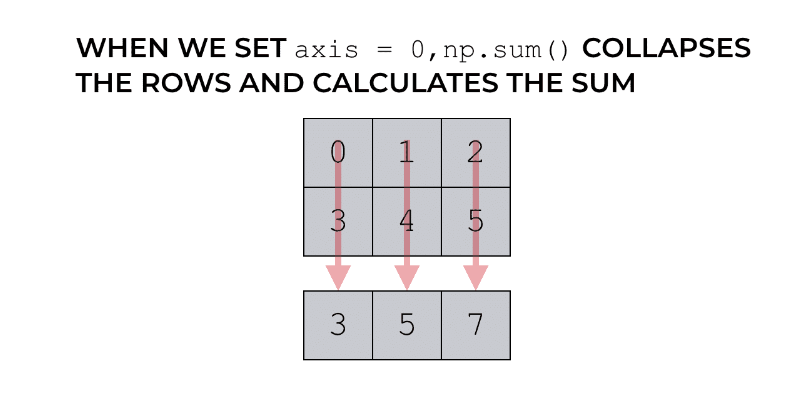

In [14]:
np.sum(np_array_2d, axis = 1)

array([ 3, 12])

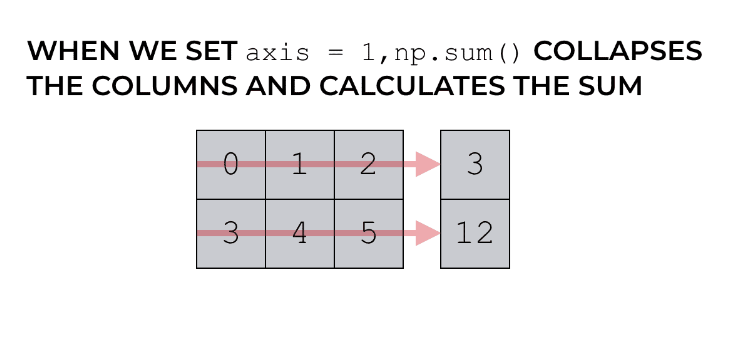

<a class="anchor" id="reshaping_arrays"></a>


### Reshaping Arrays

Another important concept here is to reshape your NumPy Arrays, especially when you are dealing with multidimensional arrays. It's common for you to create a NumPy Array in just one dimension, reshaping it to a multidimension later, or vice versa. A key idea here is that you can change the shape of your arrays, but the number of elements should not be changed; for example, you can't reshape a `3x3` array to a `10x1` array. The total number of elements (or a so-called data buffer in the ndarray internal organization) should be consistent before and after reshaping. Or ,you might need to resize, but that's another story. Now, let's look at some shape manipulations:

In [12]:
x = np.arange(24)

In [13]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [14]:
x.shape = 2, 3, -1

In [15]:
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

<a class="anchor" id="broadcasting"></a>


## Broadcasting

NumPy operations are mostly done element-wise, which requires two arrays in an operation to have the same shape; however, this doesn't mean that NumPy operations can't take two differently shaped arrays (refer to the first example we looked at with scalars). NumPy provides the flexibility to broadcast a smaller-sized array across a larger one. But we can't broadcast the array to just about any shape. It needs to follow certain constrains; we will be covering them in this section. One key idea to keep in mind is that broadcasting involves performing meaningful operations over two differently shaped arrays. However, inappropriate broadcasting might lead to an inefficient use of memory that slows down computation.

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape, as in the following example:

In [25]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])

In [26]:
a * b

array([2., 4., 6.])

NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:

In [27]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

The result is equivalent to the previous example where `b` was an array. We can think of the scalar `b` being stretched during the arithmetic operation into an array with the same shape as `a`. The new elements in `b`, as shown in the following figure, are simply copies of the original scalar. The stretching analogy is only conceptual. NumPy is smart enough to use the original scalar value without actually making copies so that broadcasting operations are as memory and computationally efficient as possible.

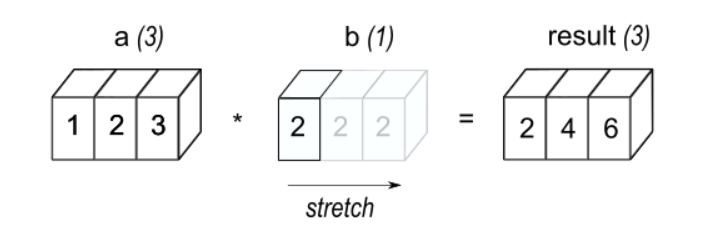

The code in the second example is more efficient than that in the first because broadcasting moves less memory around during the multiplication (`b` is a scalar rather than an array).

<a class="anchor" id="general_broadcasting_rules"></a>


### General Broadcasting Rules

The general rule for broadcasting is to determine whether two arrays are compatible with dimensioning. There are two conditions that need to be met:

- Two arrays should be of equal dimensions, or
- One of them is 1

In other words, two dimensions are compatible when

- They are equal, or
- One of them is 1

If these conditions are not met, a `ValueError: operands could not be broadcast together` exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.

Now, we are going through three examples to take a look at how broadcasting rules work.

Arrays do not need to have the same number of dimensions. For example, if you have a `256x256x3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3
```

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other.

In the following example, both the `A` and `B` arrays have axes with length one that are expanded to a larger size during the broadcast operation:
```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```

Let's take a look at another example.

In [58]:
x = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20]]) 

In [59]:
x

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20]])

In [60]:
y = np.array([1, 2, 3]) 

In [61]:
y

array([1, 2, 3])

In [62]:
x + y

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23]])

Let's make the preceding code into a graph to help us understand broadcasting. The `x` variable has a shape of `(3, 3)`, while `y` only has a shape of `3`. But in NumPy broadcasting, the shape of `y` is translated to `3` by `1`; therefore, the second condition of the rule has been met. `y` has been broadcast to the same shape of `x` by repeating it. The `+` operation can apply element-wise.

Next, we are going to show you the result of broadcasting both arrays:

In [64]:
x = np.array([[0], [10], [20]]) 

In [66]:
x.shape, y.shape

((3, 1), (3,))

In [67]:
x + y

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23]])

The preceding example shows you how both `x` and `y` are broadcast. `x` is broadcast by the column, while `y` is broadcast by the row since both of them have dimension that are equal to 1 in terms of their shape. The second broadcasting condition has been met, and the new result array is a `3` by `3` array.

Let's take a look of our last example, which two arrays can't meet the requirement of broadcasting rules:

In [69]:
x = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20]])

In [70]:
y = np.arange(1, 5) 

In [71]:
x + y

ValueError: operands could not be broadcast together with shapes (3,3) (4,) 

In the third example, broadcasting can't be performed due to `x` and `y` as they have different shapes in the row dimension and none of them are equal to `1`. Thus, none of the broadcasting conditions can be met. NumPy throws `ValueError`, telling you that the shape is incompatible.

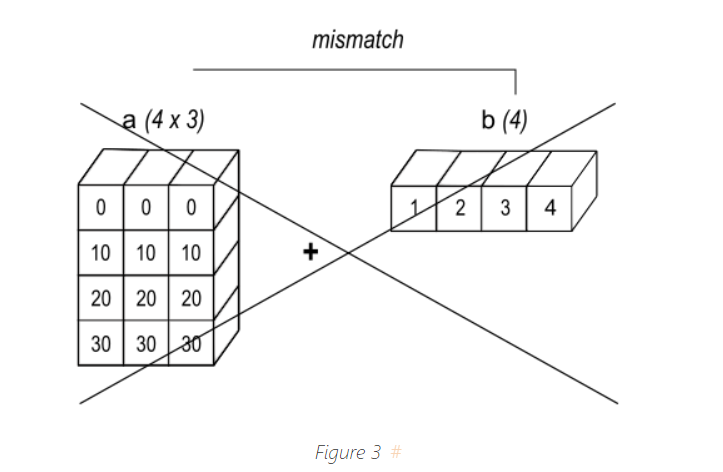

Understanding broadcasting is an important part of mastering vectorized calculations, and vectorized calculations are the way to write clean, idiomatic NumPy code.

<a class="anchor" id="more_arrays_broadcasting_examples"></a>

### More Arrays Broadcasting Examples

A set of arrays is called “broadcastable” to the same shape if the above rules produce a valid result.

For example, if `a.shape` is `(5,1)`, `b.shape` is `(1,6)`, `c.shape` is `(6,)` and `d.shape` is `()` so that `d` is a scalar, then a, b, c, and d are all broadcastable to dimension (5,6); and

- `a` acts like a `(5,6)` array where `a[:,0]` is broadcast to the other columns,
- `b` acts like a `(5,6)` array where `b[0,:]` is broadcast to the other rows,
- `c` acts like a `(1,6)` array and therefore like a `(5,6)` array where `c[:]` is broadcast to every row, and finally,
- `d` acts like a `(5,6)` array where the single value is repeated.

Here are some more examples:

```
A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4

A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4

A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5
```

Here are examples of shapes that do not broadcast:

```
A      (1d array):  3
B      (1d array):  4 # trailing dimensions do not match

A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched
```

An example of broadcasting when a 1-d array is added to a 2-d array:

In [29]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])

b = np.array([1.0, 2.0, 3.0])

In [30]:
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [31]:
b = np.array([1.0, 2.0, 3.0, 4.0])

In [32]:
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In some cases, broadcasting stretches both arrays to form an output array larger than either of the initial arrays.